In [1]:
import numpy as np
import pandas as pd
# from loguru import logger
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

## Loading the Dataset

Define our response `y` and predictor, `X`, variables.

In [2]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Fit a Random Forest Regressor

In [3]:
model = RandomForestRegressor(n_estimators=20, bootstrap=True)
model.fit(X, y)

RandomForestRegressor(n_estimators=20)

## Create our ALE Plots

### 1D Main Effect ALE Plot

In [4]:
import sys
sys.path

['C:\\D_Drive\\Indra\\github_projects\\explainability\\ALEPython-dev\\examples',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\python311.zip',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\DLLs',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01',
 '',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\Pythonwin']

In [5]:
alepath="C:\D_Drive\Indra\github_projects\explainability\ALEPython-dev\src"
sys.path.insert(0,alepath)
sys.path

['C:\\D_Drive\\Indra\\github_projects\\explainability\\ALEPython-dev\\src',
 'C:\\D_Drive\\Indra\\github_projects\\explainability\\ALEPython-dev\\examples',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\python311.zip',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\DLLs',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01',
 '',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\iammo\\anaconda3\\envs\\demo01\\Lib\\site-packages\\Pythonwin']

In [6]:
import alepython

In [7]:
alepython.fn_check()

2024-04-09 22:35:38.866 | INFO     | alepython.ale:fn_check:29 - In the fn_check method
2024-04-09 22:35:38.870 | DEBUG    | alepython.ale:fn_check:31 - A debug message.
2024-04-09 22:35:38.871 | INFO     | alepython.ale:fn_check:32 - An info message.
2024-04-09 22:35:38.872 | SUCCESS  | alepython.ale:fn_check:33 - A success message.
2024-04-09 22:35:38.873 | WARNING  | alepython.ale:fn_check:34 - A warning message.
2024-04-09 22:35:38.875 | ERROR    | alepython.ale:fn_check:35 - An error message.
2024-04-09 22:35:38.876 | CRITICAL | alepython.ale:fn_check:36 - A critical message.


2024-04-09 22:35:39.144 | DEBUG    | alepython.ale:_first_order_ale_quant:376 - Quantiles: [2.2 2.4 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.8 3.9 4.4].
2024-04-09 22:35:39.151 | DEBUG    | alepython.ale:_first_order_ale_quant:376 - Quantiles: [2.2 2.3 2.5 2.6 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.7 3.8 4.4].
2024-04-09 22:35:39.167 | DEBUG    | alepython.ale:_first_order_ale_quant:376 - Quantiles: [2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.4 3.6 3.8 4.1].
2024-04-09 22:35:39.173 | DEBUG    | alepython.ale:_first_order_ale_quant:376 - Quantiles: [2.2 2.3 2.5 2.7 2.8 2.9 3.  3.1 3.2 3.4 3.6 3.9 4.2].
2024-04-09 22:35:39.187 | DEBUG    | alepython.ale:_first_order_ale_quant:376 - Quantiles: [2.2 2.3 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.4 3.5 3.6 3.8 4.4].
2024-04-09 22:35:39.197 | DEBUG    | alepython.ale:_first_order_ale_quant:376 - Quantiles: [2.  2.3 2.5 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.6 3.8 4.2].
2024-04-09 22:35:39.202 | DEBUG    | alepython.ale:_first_order_ale_quant:376 - Quantile

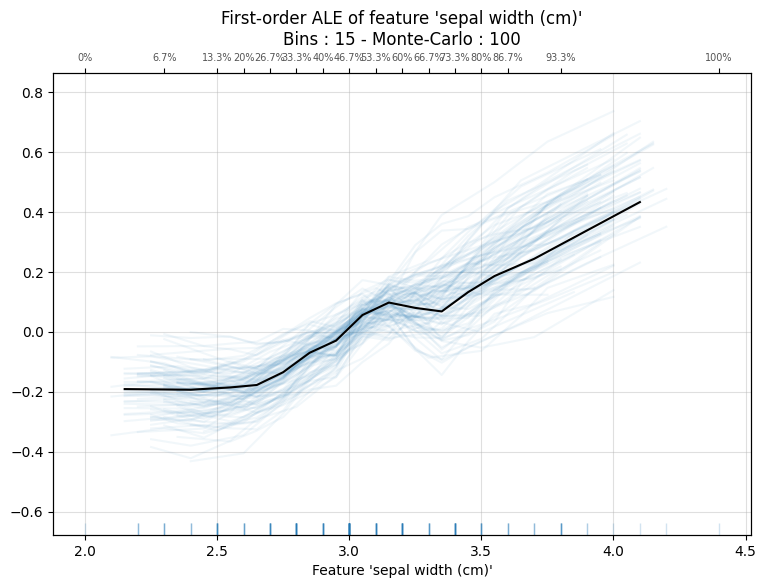

<Axes: title={'center': "First-order ALE of feature 'sepal width (cm)'\nBins : 15 - Monte-Carlo : 100"}, xlabel="Feature 'sepal width (cm)'">

In [8]:
import matplotlib as mpl

from alepython import ale_plot

mpl.rc("figure", figsize=(9, 6))
ale_plot(
    model,
    X,
    X.columns[:1],
    bins=20,
    monte_carlo=True,
    monte_carlo_rep=100,
    monte_carlo_ratio=0.6,
)

### 2D Second-Order ALE Plot

2024-04-09 22:35:41.015 | DEBUG    | alepython.ale:_second_order_ale_quant:464 - Quantiles: (array([2. , 2.5, 2.7, 2.8, 3. , 3.1, 3.2, 3.4, 3.6, 4.4]), array([1. , 1.4, 1.5, 1.7, 3.9, 4.3, 4.6, 5. , 5.3, 5.8, 6.9])).
2024-04-09 22:35:41.096 | DEBUG    | alepython.ale:_ax_quantiles:196 - Quantiles: [2.  2.5 2.7 2.8 3.  3.1 3.2 3.4 3.6 4.4].
2024-04-09 22:35:41.133 | DEBUG    | alepython.ale:_ax_quantiles:196 - Quantiles: [1.  1.4 1.5 1.7 3.9 4.3 4.6 5.  5.3 5.8 6.9].


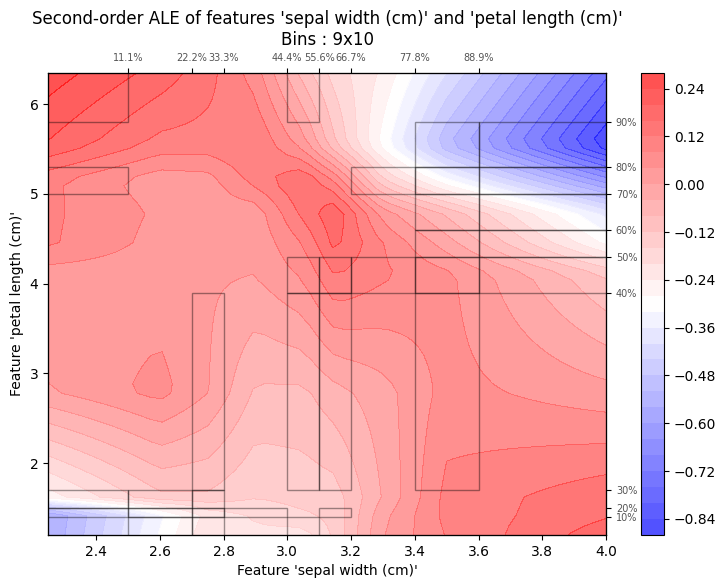

<Axes: title={'center': "Second-order ALE of features 'sepal width (cm)' and 'petal length (cm)'\nBins : 9x10"}, xlabel="Feature 'sepal width (cm)'", ylabel="Feature 'petal length (cm)'">

In [9]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(model, X, X.columns[:2], bins=10)

2024-04-09 22:35:41.665 | DEBUG    | alepython.ale:_second_order_ale_quant:464 - Quantiles: (array([1. , 1.4, 1.5, 1.7, 3.9, 4.3, 4.6, 5. , 5.3, 5.8, 6.9]), array([0.1, 0.2, 0.4, 1.1, 1.3, 1.5, 1.8, 1.9, 2.2, 2.5])).
2024-04-09 22:35:41.764 | DEBUG    | alepython.ale:_ax_quantiles:196 - Quantiles: [1.  1.4 1.5 1.7 3.9 4.3 4.6 5.  5.3 5.8 6.9].
2024-04-09 22:35:41.789 | DEBUG    | alepython.ale:_ax_quantiles:196 - Quantiles: [0.1 0.2 0.4 1.1 1.3 1.5 1.8 1.9 2.2 2.5].


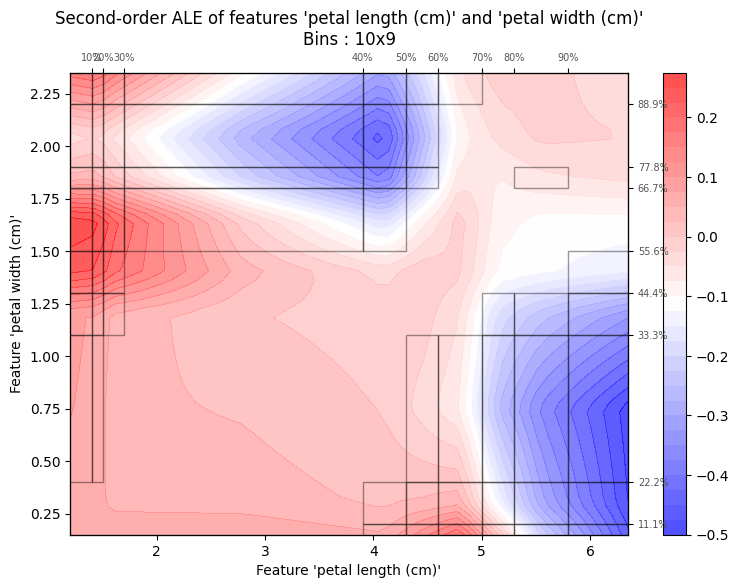

<Axes: title={'center': "Second-order ALE of features 'petal length (cm)' and 'petal width (cm)'\nBins : 10x9"}, xlabel="Feature 'petal length (cm)'", ylabel="Feature 'petal width (cm)'">

In [10]:
mpl.rc("figure", figsize=(9, 6))
ale_plot(model, X, X.columns[1:], bins=10)